## This notebook generates the components of Figure 1 in "Entrained debris records regrowth of the Greenland Ice Sheet after the last interglacial" 
---
That figure contains the following components

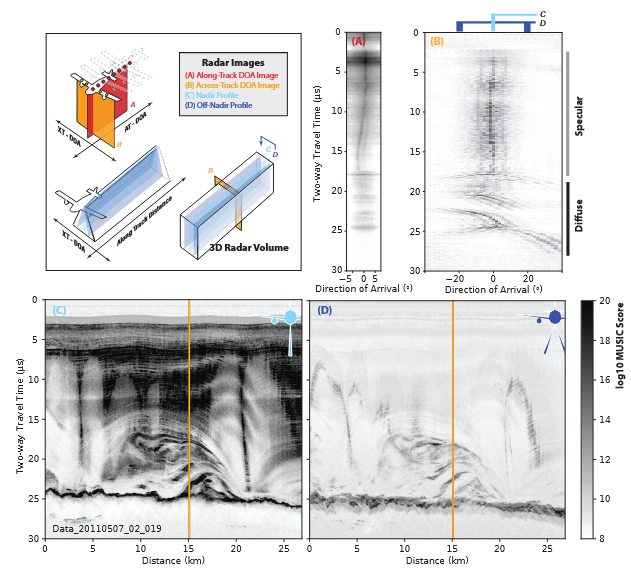

In [1]:
#############################################
### Necessary input statements

######## System untilities
import os
import shutil
import sys
import glob

######## Numerical and plotting tools
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['pdf.fonttype'] = 42

######## Any necessary path additions can go here:
sys.path.append('/mnt/data01/Code/opr_python/')

######## OPR library tools
import opr_python as ndh

generate_pdfs_flag = 0

In [2]:
###########################################################
### Identify the radar data necessary for image generation:

data_root = '/mnt/data02/Dataverse_TestData/EntrainedDebris/'
file_target = 'Data_20110507_02_019'

file_opts = sorted(glob.glob(data_root+'*'+file_target+'*'))
file_opts

['/mnt/data02/Dataverse_TestData/EntrainedDebris/Music_Data_20110507_02_019.mat',
 '/mnt/data02/Dataverse_TestData/EntrainedDebris/SLC_Data_20110507_02_019.mat']

In [3]:
###########################################################
### Load the radar data necessary for image generation:

music_data = ndh.radar_load_music(data_root+'Music_'+file_target+'.mat')
standardradar_data, standarddepth_data = ndh.radar_load(data_root+'SLC_'+file_target+'.mat')

/mnt/data01/Code/opr_python/opr_python/elevation_shift.py:79: RuntimeWarning: All-NaN slice encountered
  if np.nanmin(np.mod(bed,1)) == 0:
/mnt/data01/Code/opr_python/opr_python/elevation_shift.py:130: ComplexWarning: Casting complex values to real discards the imaginary part
  new_data1[np.arange(len(select_inds)),i] = data[select_inds.astype(int),i]


In [4]:
###########################################################
### Generate the Doppler Files
sdoppler_data = ndh.delay_doppler(standardradar_data, window_size=300, target_ind=0, ind_spacing=50, deg0_or_rad1=0, return_fft=1)


row_inds = np.arange(1500,4200)
col_inds = [0,700]

############# Identifying the indecies for each dataset for the final figure
### This is determined from the first doppler dataset
music_inds = ndh.find_nearest_xy(np.stack([music_data['x'],music_data['y']]).T,np.stack([standardradar_data['x'][row_inds],standardradar_data['y'][row_inds]]).T)
music_inds = np.unique(music_inds['index'])

delay_doppler_inds = ndh.find_nearest_xy(np.stack([sdoppler_data['x'],sdoppler_data['y']]).T,np.stack([standardradar_data['x'][row_inds],standardradar_data['y'][row_inds]]).T)
delay_doppler_inds = np.unique(delay_doppler_inds['index'])

target_ind = 3175;
music_target = ndh.find_nearest_xy(np.stack([music_data['x'],music_data['y']]).T,np.stack([standardradar_data['x'][target_ind:target_ind+1],standardradar_data['y'][target_ind:target_ind+1]]).T)
music_target = np.unique(music_target['index'])
dd_target = ndh.find_nearest_xy(np.stack([sdoppler_data['x'],sdoppler_data['y']]).T,np.stack([standardradar_data['x'][target_ind:target_ind+1],standardradar_data['y'][target_ind:target_ind+1]]).T)
dd_target = np.unique(dd_target['index'])

Center Frequency: 195000000.0


100%|██████████████████████████████████████| 1078/1078 [00:01<00:00, 747.64it/s]


(1498, 64, 3155)


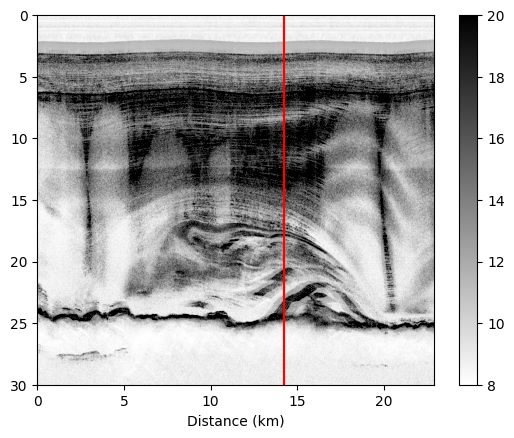

In [5]:
###############################
### The nadir Image
center_ind = 32
angle_range = 2
print(music_data['Tomo']['img'].shape)
theta_deg1 = np.rad2deg(music_data['Tomo']['theta'][:,0])[:,0]

dist_shift = music_data['distance'][music_inds[0]]/1000
cdata = plt.imshow(np.max(10*np.log10(music_data['Tomo']['img'][:,center_ind-angle_range:center_ind+angle_range+1,music_inds]),axis=1),
                   extent=[0,music_data['distance'][music_inds[-1]]/1000-dist_shift,music_data['Time'][0]*10**6,music_data['Time'][-1]*10**6]
                           ,origin='lower',cmap='gray_r',vmin=8,vmax=20)
plt.axvline(music_data['distance'][music_target]/1000-dist_shift,c='red')
plt.axvline(music_data['distance'][music_target]/1000-dist_shift,c='red')
plt.colorbar(cdata)
plt.gca().set_aspect('auto')
plt.ylim([30,0])
plt.xlabel('Distance (km)')

if generate_pdfs_flag == 1:
    plt.savefig('Matplotlib_Fig1a.pdf')

22.024312837042164


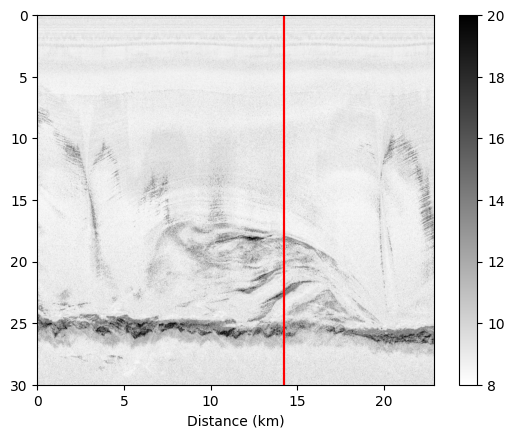

In [6]:
#######################################
### The off-nadir (x-track) image
center_ind = 32
shift = 12
angle_range = 2

cdata = plt.imshow(np.max(10*np.log10(
    np.concatenate([music_data['Tomo']['img'][:,center_ind-shift-angle_range:center_ind-shift+angle_range+1,music_inds],
                    music_data['Tomo']['img'][:,center_ind+shift-angle_range:center_ind+shift+angle_range+1,music_inds]],axis=1).squeeze()),axis=1),
                    extent=[0,music_data['distance'][music_inds[-1]]/1000-dist_shift,music_data['Time'][0]*10**6,music_data['Time'][-1]*10**6],
                    origin='lower',cmap='gray_r',vmin=8,vmax=20)
plt.axvline(music_data['distance'][music_target]/1000-dist_shift,c='red')
plt.axvline(music_data['distance'][music_target]/1000-dist_shift,c='red')
plt.colorbar(cdata)
plt.gca().set_aspect('auto')
plt.ylim([30,0])
plt.xlabel('Distance (km)')
plt.savefig('Matplotlib_Fig1b.pdf')

if generate_pdfs_flag == 1:
    print(theta_deg1[center_ind+shift])

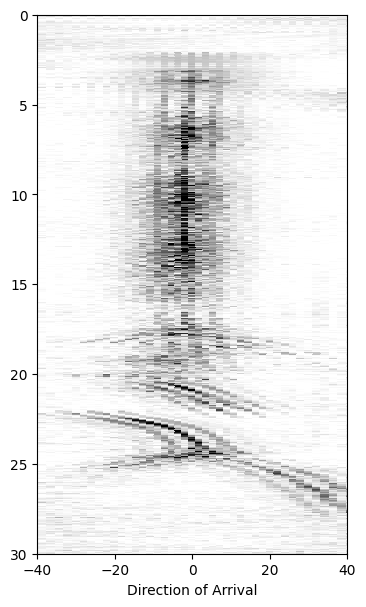

In [7]:
#######################################
### The off-nadir (x-track) image
plt.figure(figsize=(4,7))


imdata = plt.pcolor(theta_deg1, music_data['Time']*1e6,
                    10*np.log10(music_data['Tomo']['img'][:,:,music_target]).squeeze(),
                   cmap='gray_r',vmin=8,vmax=20)  
plt.colorbar(cdata)
plt.gca().set_aspect('auto')
plt.ylim([30,0])
plt.xlim([-40,40])
plt.xlabel('Direction of Arrival')
if generate_pdfs_flag == 1:
    plt.savefig('Matplotlib_Fig1c.pdf')

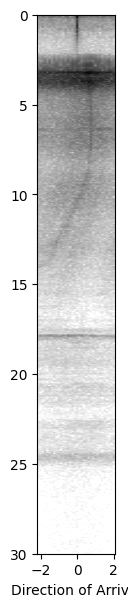

In [8]:
#######################################
### The off-nadir (along-track) image
plt.figure(figsize=(1,7))
theta_deg3 = sdoppler_data['slope_axis']
imdata = plt.imshow(sdoppler_data['doppler_data'][dd_target,:,:].squeeze(),
                    extent=[theta_deg3[0],theta_deg3[-1],
                            sdoppler_data['Time'][0]*1e6,sdoppler_data['Time'][-1]*1e6],
                    origin='lower',aspect='auto',cmap='gray_r',vmin=-160,vmax=-40)   

plt.ylim([30,0])
plt.xlabel('Direction of Arrival')
if generate_pdfs_flag == 1:
    plt.savefig('Matplotlib_Fig1d_v2.pdf')